# Text Classifier

For training and testing I used the [_fetch_20newsgroups_](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) by _sklearn.datasets_



## Importing our classes, dataset and the more functions

In [74]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

## Limiting the number of categories

In [75]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.electronics']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

## Feedback about our data

In [76]:
print(train.target_names)

['alt.atheism', 'comp.graphics', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.electronics', 'sci.med', 'soc.religion.christian']


In [77]:
train.target[:10]

array([5, 1, 6, 7, 6, 5, 3, 5, 0, 8])

In [78]:
for t in train.target[:10]:
  print(train.target_names[t])

rec.sport.hockey
comp.graphics
sci.electronics
sci.med
sci.electronics
rec.sport.hockey
rec.motorcycles
rec.sport.hockey
alt.atheism
soc.religion.christian


## About the Classifier - TF-IDF

In [79]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.data)

Classifier training

In [80]:
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
clf.fit(X_train, train.target)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

## Evaluating the performance

In [81]:
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = test.data

vect_transform = vectorizer.transform(docs_test)
predicted = clf.predict(vect_transform)

print(metrics.classification_report(test.target, predicted, target_names=test.target_names))

print(clf.classes_)

                        precision    recall  f1-score   support

           alt.atheism       0.91      0.78      0.84       319
         comp.graphics       0.87      0.93      0.90       389
             rec.autos       0.96      0.93      0.94       396
       rec.motorcycles       0.94      0.97      0.96       398
    rec.sport.baseball       0.92      0.94      0.93       397
      rec.sport.hockey       0.93      0.98      0.95       399
       sci.electronics       0.90      0.83      0.87       393
               sci.med       0.96      0.88      0.91       396
soc.religion.christian       0.85      0.95      0.90       398

              accuracy                           0.91      3485
             macro avg       0.91      0.91      0.91      3485
          weighted avg       0.91      0.91      0.91      3485

[0 1 2 3 4 5 6 7 8]


In [82]:
confusion_matrix = confusion_matrix(test.target, predicted)
print(confusion_matrix)

[[249   3   0   3   3   1   2   9  49]
 [  4 363   1   1   6   0   9   1   4]
 [  1   4 367   6   5   0  12   1   0]
 [  1   1   7 385   3   0   1   0   0]
 [  0   0   1   0 373  22   0   0   1]
 [  0   1   0   0   5 392   0   0   1]
 [  6  34   6   6   3   3 327   4   4]
 [  6  10   0   7   6   4   7 347   9]
 [  8   3   1   0   1   0   4   1 380]]


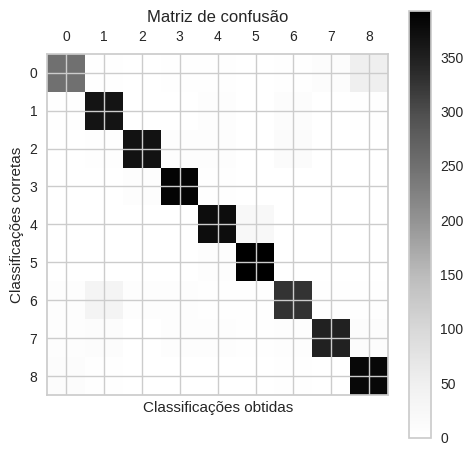

In [83]:
# para melhor visualização da matriz de confusao
plt.matshow(confusion_matrix)
plt.title('Matriz de confusão')
plt.colorbar()

plt.ylabel('Classificações corretas')
plt.xlabel('Classificações obtidas')
plt.show()

## Predict new results

In [89]:
docs_new = [
    'Many individuals around the world identify as atheists, rejecting the belief in a higher power and relying on human reason and evidence-based thinking to navigate their lives.'
    , 'Cars have revolutionized transportation and transformed the way we live, providing fast and convenient means of getting around while also posing significant challenges to the environment and public safety.'
    , 'Christianity is one of the world\'s largest religions, tracing its roots back to the teachings of Jesus Christ and encompassing a wide variety of beliefs and practices across different denominations and cultures.'
    , 'Medicine plays a critical role in improving health and prolonging life, drawing on advances in science and technology to diagnose and treat a wide range of illnesses and injuries while also addressing the social and economic factors that influence health outcomes.'
    , 'Atheism has been a subject of philosophical and cultural discourse throughout history, with proponents and critics debating the role of religion in society, the nature of belief and morality, and the implications of a godless universe.'
    , 'Computer graphics is a rapidly evolving field that enables us to create and manipulate visual content using sophisticated algorithms and tools, allowing us to bring our ideas to life in a variety of mediums, from movies and video games to scientific simulations and virtual reality.'
    , 'Medicine is a multifaceted discipline that encompasses the study of the human body, the prevention and treatment of illness, and the promotion of wellness, drawing on diverse fields such as biology, psychology, and social science to improve health outcomes for individuals and communities around the world.'
    , 'Medical research is a dynamic and ever-evolving field, where new discoveries and breakthroughs are constantly challenging our understanding of human health and disease, and machine learning algorithms have emerged as a powerful tool to help us make sense of the vast and complex data that underpins our knowledge of the human body and its systems.'
    , 'My favorite baseball team is the New York Yankees, and I love going to their games at Yankee Stadium.'
    , 'Riding a motorcycle on a winding road with the wind in your face is an exhilarating experience that many motorcyclists enjoy.'
    , 'Hockey is a fast-paced and physical sport that requires skill, teamwork, and strategy to win games.'
    , 'Learning about electronics and circuit design can be a rewarding experience, and it can open up many opportunities for creating innovative devices and systems.'
    , 'Attending church services and reading the Bible are important practices for many Christians around the world.'
    , 'Atheism is a nuanced and multifaceted worldview that encompasses a broad range of philosophical and ethical perspectives, from secular humanism to existential nihilism, and machine learning algorithms have the potential to help us better understand the complexities of these diverse perspectives and their implications for society and the human experience.'
    , 'Baseball is a game that has captivated the hearts and minds of millions of fans around the world, and through the use of advanced statistical analysis and machine learning techniques, we can uncover new insights and patterns in player performance data that can help teams make better decisions and gain a competitive edge on the field.'
]
X_new_tfidf_vectorize = vectorizer.transform(docs_new)

predicted = clf.predict(X_new_tfidf_vectorize)

c=0

for _, category in zip(docs_new, predicted):
  print(f'{c} => {train.target_names[category]}')
  c+=1

0 => alt.atheism
1 => rec.autos
2 => soc.religion.christian
3 => sci.med
4 => alt.atheism
5 => comp.graphics
6 => sci.med
7 => sci.med
8 => rec.sport.baseball
9 => rec.motorcycles
10 => rec.sport.hockey
11 => sci.electronics
12 => soc.religion.christian
13 => alt.atheism
14 => rec.sport.baseball
